# Fermi-Dirac Integrals

Degenerate matter follows [Fermi-Dirac statistics](https://en.wikipedia.org/wiki/Fermi%E2%80%93Dirac_statistics),
with the distribution function taking the form:

$$n(p) = \frac{g}{h^3} \frac{1}{e^{(\mathcal{E}(p) + m_e c^2 - \mu)/k_BT} + 1}$$

where $\mathcal{E}(p)$ is the kinetic energy of a single particle, $m_e c^2$ is the rest mass (assuming electrons, $m_e$, here),
$\mu$ is the chemical potential, and $g$ is the degeneracy of states ($g = 2$ for electrons).

We can write this, defining the degeneracy parameter $\eta = (\mu - m_e c^2)/k_BT$, as:

$$n(p) = \frac{2}{h^3} \frac{1}{e^{(\mathcal{E}(p)/k_BT - \eta)} + 1}$$

To get the number density of electrons, we would integrate over momentum-space (in spherical coordinates), giving:

$$n_e = \frac{8\pi}{h^3} \int_0^\infty \frac{p^2}{e^{(\mathcal{E}(p)/k_BT - \eta)} + 1} dp$$

and we can express the relation between energy and momentum (using a relativistic expression) as:

$$\mathcal{E}(p) = m_e c^2 \left [ \left (1 + \left(\frac{p}{m_e c}\right )^2 \right )^{1/2} - 1 \right ]$$

Traditionally, we do the integral in terms of dimensionless energy, $x \equiv \mathcal{E}/k_BT$, which requires us to express $p$ in terms of $\mathcal{E}$ as:

$$p = \frac{1}{c} \left [\mathcal{E}^{1/2} (\mathcal{E} + 2 m_e c^2)^{1/2}\right ]$$

Defining

$$\beta = \frac{k_B T}{m_e c^2}$$

and working through the change in variables, we have

$$n_e = \frac{8 \sqrt{2} \pi}{h^3} m_e^3 c^3 \beta^{3/2}
   \left [ \underbrace{\int_0^\infty \frac{x^{1/2} \left(1 + \beta x/2 \right )^{1/2}}{e^{x-\eta} + 1} dx}_{F_{1/2}(\eta, \beta)} +
           \beta \underbrace{\int_0^\infty \frac{x^{3/2} \left(1 + \beta x/2 \right )^{1/2}}{e^{x-\eta} + 1} dx}_{F_{3/2}(\eta, \beta)}
   \right ]$$

where the $F_k(\eta, \beta)$ are called the Fermi-Dirac integrals.  You can see this form, for example,
in [Timmes & Arnett 1999](https://ui.adsabs.harvard.edu/abs/1999ApJS..125..277T/abstract) (although note that the $\beta$ factor in front of $F_{3/2}$ is missing there).

The {py:obj}`FermiIntegral <pynucastro.eos.fermi_integrals.FermiIntegral>` class can
compute general Fermi-Dirac integrals of the form:

$$F_k(\eta, \beta) = \int_0^\infty
           \frac{x^k [1 + \beta x/2]^{1/2}}{e^{x-\eta} + 1} dx$$

where $k$ is the index and $\eta$ and $\beta$ are defined as above.

$\eta \gg 1$ means that we are degenerate, while $\eta \ll -1$ is the ideal gas regime.  Likewise, $\beta \rightarrow 0$ implies non-relativisitic while $\beta \rightarrow \infty$ is extreme-relativistic.

Typically, in stellar conditions, we can encounter $10^{-6} \le \beta \le 10^4$ and $-100 \le \eta \le 10^4$.

pynucastro computes this integral using the method of {cite:t}`Gong:2001`, which breaks the integration into 4 parts, using Legendre quadrature for the first 3 and Laguerre quadrature for the last.  Additionally, it constructs the integral in the first part in terms of $x^2$ to avoid a singularity at the origin.

## Computing the integral

We need to specify $k$, $\eta$, and $\beta$ upon creation of a `FermiIntegral`, and then we can evaluate it (and optionally its derivatives):

In [1]:
import pynucastro as pyna

In [2]:
k = 0.5
eta = 100
beta = 10
F = pyna.FermiIntegral(k, eta, beta)
F.evaluate()
print(F)

F        =          11206.29935
dF/dη    =          223.8302928
dF/dβ    =          558.0936627
d²F/dη²  =          2.236069094
d²F/dηdβ =           11.1691763
d²F/dβ²  =         -27.79487092



First and second derivatives can be disabled via the parameters to {py:func}`evaluate <pynucastro.eos.fermi_integrals.FermiIntegral.evaluate>`.

## Trends

We can explore how $F_k$ varies with $\eta$ and $\beta$.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

First, for fixed $\eta$, let's see the variation with $\beta$

In [4]:
k = 0.5
Fs = {}
betas = np.logspace(-6, 4, 50)
for eta in [-10, -1, 0,
            1, 10, 100, 1000]:
    res = []
    for beta in betas:
        F = pyna.FermiIntegral(k, eta, beta)
        F.evaluate(do_first_derivs=False, do_second_derivs=False)
        res.append(F.F)

    Fs[eta] = res

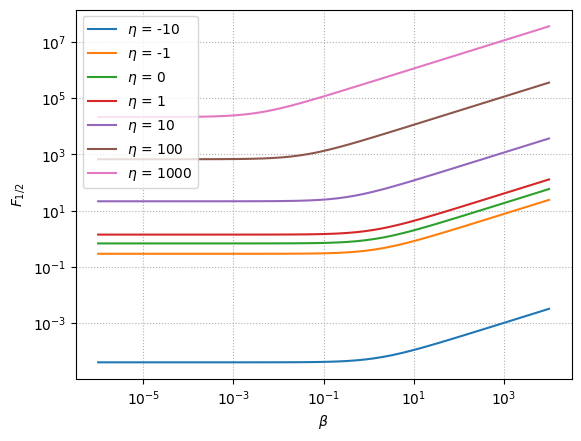

In [5]:
fig, ax = plt.subplots()
for key in Fs:
    ax.loglog(betas, Fs[key], label=rf"$\eta$ = {key}")
ax.legend()
ax.set_xlabel(r"$\beta$")
ax.set_ylabel(r"$F_{1/2}$")
ax.grid(ls=":")

Now for fixed $\beta$, let's see the variation with $\eta$.

In [6]:
etam = np.logspace(-2, 1.5, 21)
etap = np.logspace(-2, 3, 41)
etas = np.concatenate((-etam[::-1], etap))

In [7]:
k = 0.5
Fs = {}
for beta in np.logspace(-6, 4, 6):
    res = []
    for eta in etas:
        F = pyna.FermiIntegral(k, eta, beta)
        F.evaluate(do_first_derivs=False, do_second_derivs=False)
        res.append(F.F)

    Fs[beta] = res

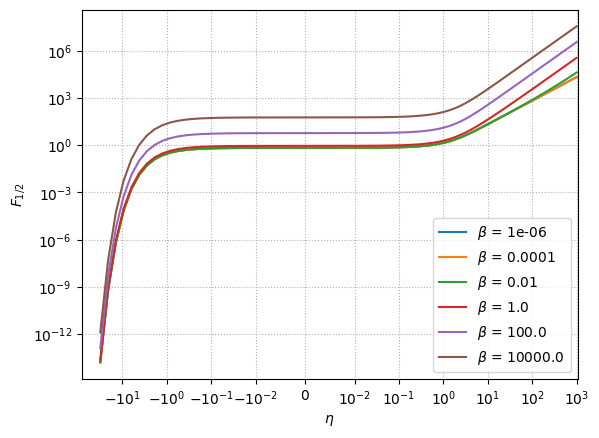

In [8]:
fig, ax = plt.subplots()
for key in Fs:
    ax.plot(etas, Fs[key], label=rf"$\beta$ = {key}")
ax.legend()
ax.set_yscale("log")
ax.set_xscale("symlog", linthresh=1.e-2)
ax.set_xlabel(r"$\eta$")
ax.set_ylabel(r"$F_{1/2}$")
ax.grid(ls=":")